In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
# Add the project root (toy-wm directory) to sys.path so we can import src as a package
# This allows relative imports within the package to work correctly
# Assumes notebook is run from the project root directory
project_root = os.getcwd()  # or use: os.path.dirname(os.path.abspath(''))
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

/share/u/wendler/code/toy-wm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t

# Import using absolute path from src package
from src.utils.checkpoint import load_model_from_config

#model = load_model_from_config("configs/small_6frame.yaml")
model = load_model_from_config("configs/bigger_30frame_causal.yaml", strict=False)
model.eval()

loading configs/bigger_30frame_causal.yaml


CausalDit(
  (rope_seq): RoPE()
  (blocks): ModuleList(
    (0-7): 8 x CausalBlock(
      (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (selfattn): AttentionEinOps(
        (rope): RoPE()
        (ln1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (ln2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (geglu): GEGLU(
        (up_proj): Linear(in_features=384, out_features=1536, bias=True)
        (up_gate): Linear(in_features=384, out_features=1536, bias=True)
        (down): Linear(in_features=1536, out_features=384, bias=True)
        (nonlin): SiLU()
      )
      (modulation): Sequential(
        (0): SiLU()
        (1): Linear(in_features=384, out_features=2304, bias=True)
      )
    )
  )
  (patch): Patch(
    (init_conv_seq): Sequential(
      (0): Conv2d(3, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): GroupNorm(3

In [3]:
model.activate_caching(1, 300)

torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 0
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 1
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 2
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 3
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 4
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 5
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 6
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 

In [4]:
from src.datasets.pong1m import get_loader

loader, pred2frame = get_loader(duration=1, fps=30, mode='-1,1')
frames, actions = next(iter(loader))
frames = pred2frame(frames)

520 batches


In [ ]:
from src.trainers.diffusion_forcing import sample

def render_video(actions, n_steps=8, cfg=0, negative_actions=None, clamp=True):
    model.cache.reset()
    device = model.device
    frames = t.randn(1, actions.shape[1], 3, 24, 24, device="cpu")
    for aidx in range(actions.shape[1]):
        print(aidx)
        noise = t.randn(1, 1, 3, 24, 24, device=device)
        z = sample(model, noise, actions[:, aidx:aidx+1], num_steps=n_steps, cfg=cfg, negative_actions=negative_actions)
        model.cache.update_global_location(1)
        frames[:, aidx:aidx+1] = z.detach().cpu()
        if clamp:
            frames = frames.clamp(-1, 1)
    return frames

In [6]:
model = t.compile(model)

0


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0


100%|██████████| 4/4 [00:44<00:00, 11.19s/it]


RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forward torch.Size([1, 65, 12, 32]) 0
RoPE forwar

  0%|          | 0/4 [00:00<?, ?it/s]W1105 16:25:51.847000 110247 .venv/lib/python3.13/site-packages/torch/_dynamo/convert_frame.py:1358] [4/8] torch._dynamo hit config.recompile_limit (8)
W1105 16:25:51.847000 110247 .venv/lib/python3.13/site-packages/torch/_dynamo/convert_frame.py:1358] [4/8]    function: 'forward' (/share/u/wendler/code/toy-wm/src/models/dit_dforce.py:39)
W1105 16:25:51.847000 110247 .venv/lib/python3.13/site-packages/torch/_dynamo/convert_frame.py:1358] [4/8]    last reason: 4/7: self.layer_idx == 7                                      # assert layer_idx == self.curr_layer, f"layer idx should be the same as our internal counter but we got {layer_idx} and internal is {self.curr_layer}."  # src/nn/attn.py:31 in get (HINT: torch.compile considers integer attributes of the nn.Module to be static. If you are observing recompilation, you might want to make this integer dynamic using torch._dynamo.config.allow_unspec_int_on_nn_module = True, or convert this integer into a

RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 

100%|██████████| 4/4 [00:00<00:00, 22.85it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 12, 32]) 65
RoPE forward torch.Size([1, 65, 

  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forwa

100%|██████████| 4/4 [00:00<00:00, 22.54it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
RoPE forward torch.Size([1, 65, 12, 32]) 130
3


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195


 75%|███████▌  | 3/4 [00:00<00:00, 23.31it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forwa

100%|██████████| 4/4 [00:00<00:00, 23.08it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
RoPE forward torch.Size([1, 65, 12, 32]) 195
4


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 22.84it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forward torch.Size([1, 65, 12, 32]) 260
RoPE forwa

100%|██████████| 4/4 [00:00<00:00, 22.95it/s]


5


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forwa

100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
RoPE forward torch.Size([1, 65, 12, 32]) 325
6


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 22.48it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390


100%|██████████| 4/4 [00:00<00:00, 22.48it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
RoPE forward torch.Size([1, 65, 12, 32]) 390
7


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 21.71it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455


100%|██████████| 4/4 [00:00<00:00, 22.02it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
RoPE forward torch.Size([1, 65, 12, 32]) 455
8


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 27.02it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520


100%|██████████| 4/4 [00:00<00:00, 26.90it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
RoPE forward torch.Size([1, 65, 12, 32]) 520
9


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 23.92it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585


100%|██████████| 4/4 [00:00<00:00, 23.66it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
RoPE forward torch.Size([1, 65, 12, 32]) 585
10


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 23.62it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650


100%|██████████| 4/4 [00:00<00:00, 23.51it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
RoPE forward torch.Size([1, 65, 12, 32]) 650
11


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 23.68it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715


100%|██████████| 4/4 [00:00<00:00, 23.21it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 715
RoPE forward torch.Size([1, 65, 12, 32]) 715
12


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 23.41it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780


100%|██████████| 4/4 [00:00<00:00, 23.49it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
RoPE forward torch.Size([1, 65, 12, 32]) 780
13


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 22.71it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845


100%|██████████| 4/4 [00:00<00:00, 22.67it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 845
RoPE forward torch.Size([1, 65, 12, 32]) 845
14


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 22.39it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910


100%|██████████| 4/4 [00:00<00:00, 22.52it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
RoPE forward torch.Size([1, 65, 12, 32]) 910
15


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forwa

 75%|███████▌  | 3/4 [00:00<00:00, 23.45it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975


100%|██████████| 4/4 [00:00<00:00, 23.13it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
RoPE forward torch.Size([1, 65, 12, 32]) 975
16


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.84it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040


100%|██████████| 4/4 [00:00<00:00, 21.67it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
RoPE forward torch.Size([1, 65, 12, 32]) 1040
17


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.23it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105


100%|██████████| 4/4 [00:00<00:00, 22.08it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1105
RoPE forward torch.Size([1, 65, 12, 32]) 1105
18


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 24.88it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170


100%|██████████| 4/4 [00:00<00:00, 24.58it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
RoPE forward torch.Size([1, 65, 12, 32]) 1170
19


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 23.47it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235


100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1235
RoPE forward torch.Size([1, 65, 12, 32]) 1235
20


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 24.43it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300
RoPE forward torch.Size([1, 65, 12, 32]) 1300


100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


21


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 24.55it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365
RoPE forward torch.Size([1, 65, 12, 32]) 1365


100%|██████████| 4/4 [00:00<00:00, 24.49it/s]


22


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.90it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430
RoPE forward torch.Size([1, 65, 12, 32]) 1430


100%|██████████| 4/4 [00:00<00:00, 23.07it/s]


23


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.68it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495


100%|██████████| 4/4 [00:00<00:00, 22.23it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
RoPE forward torch.Size([1, 65, 12, 32]) 1495
24


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.36it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12, 32]) 1560
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.08it/s]


25


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.44it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625


100%|██████████| 4/4 [00:00<00:00, 21.71it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1625
RoPE forward torch.Size([1, 65, 12, 32]) 1625
26


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.64it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690


100%|██████████| 4/4 [00:00<00:00, 22.37it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1690
RoPE forward torch.Size([1, 65, 12, 32]) 1690
27


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.26it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755


100%|██████████| 4/4 [00:00<00:00, 21.21it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
RoPE forward torch.Size([1, 65, 12, 32]) 1755
28


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 23.14it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820
RoPE forward torch.Size([1, 65, 12, 32]) 1820


29


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.81it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 22.51it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
RoPE forward torch.Size([1, 65, 12, 32]) 1885
30


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.82it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.16it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 1950
RoPE forward torch.Size([1, 65, 12, 32]) 1950
31


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.92it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015


100%|██████████| 4/4 [00:00<00:00, 21.05it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
RoPE forward torch.Size([1, 65, 12, 32]) 2015
32


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.45it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080


100%|██████████| 4/4 [00:00<00:00, 21.60it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2080
RoPE forward torch.Size([1, 65, 12, 32]) 2080
33


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.58it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12, 32]) 2145
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.24it/s]


34


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.39it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210


100%|██████████| 4/4 [00:00<00:00, 20.65it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
RoPE forward torch.Size([1, 65, 12, 32]) 2210
35


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.65it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275


100%|██████████| 4/4 [00:00<00:00, 21.61it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
RoPE forward torch.Size([1, 65, 12, 32]) 2275
36


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.31it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340
RoPE forward torch.Size([1, 65, 12, 32]) 2340


100%|██████████| 4/4 [00:00<00:00, 21.55it/s]


37


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.39it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.64it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2405
RoPE forward torch.Size([1, 65, 12, 32]) 2405
38


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.43it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12, 32]) 2470
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.28it/s]


39


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.43it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12, 32]) 2535
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.28it/s]


40


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.59it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12, 32]) 2600
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.49it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2600


100%|██████████| 4/4 [00:00<00:00, 19.46it/s]


41


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.76it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12, 32]) 2665
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.34it/s]


42


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.33it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12, 32]) 2730
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.70it/s]


43


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.73it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795


100%|██████████| 4/4 [00:00<00:00, 21.80it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
RoPE forward torch.Size([1, 65, 12, 32]) 2795
44


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.06it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860
RoPE forward torch.Size([1, 65, 12, 32]) 2860


100%|██████████| 4/4 [00:00<00:00, 22.05it/s]


45


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.14it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925


100%|██████████| 4/4 [00:00<00:00, 22.46it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
RoPE forward torch.Size([1, 65, 12, 32]) 2925
46


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.38it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990


100%|██████████| 4/4 [00:00<00:00, 21.33it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 2990
RoPE forward torch.Size([1, 65, 12, 32]) 2990
47


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.02it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055


100%|██████████| 4/4 [00:00<00:00, 20.63it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055
RoPE forward torch.Size([1, 65, 12, 32]) 3055


48


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.23it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120
RoPE forward torch.Size([1, 65, 12, 32]) 3120


100%|██████████| 4/4 [00:00<00:00, 19.98it/s]


49


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 18.28it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12, 32]) 3185
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.67it/s]


50


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.36it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.86it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 3250
RoPE forward torch.Size([1, 65, 12, 32]) 3250
51


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.46it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12, 32]) 3315
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.58it/s]


52


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.21it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12, 32]) 3380
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.74it/s]


53


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.49it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12, 32]) 3445
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.37it/s]


54


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.77it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12, 32]) 3510
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.40it/s]


55


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.69it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.95it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575
RoPE forward torch.Size([1, 65, 12, 32]) 3575


56


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 18.67it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.97it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3640
RoPE forward torch.Size([1, 65, 12, 32]) 3640


100%|██████████| 4/4 [00:00<00:00, 18.87it/s]


57


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.85it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12, 32]) 3705
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.41it/s]


58


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770


 50%|█████     | 2/4 [00:00<00:00, 19.14it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12, 32]) 3770
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.01it/s]


59


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.77it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835


100%|██████████| 4/4 [00:00<00:00, 20.82it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
RoPE forward torch.Size([1, 65, 12, 32]) 3835
60


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.66it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900


100%|██████████| 4/4 [00:00<00:00, 21.68it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
RoPE forward torch.Size([1, 65, 12, 32]) 3900
61


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.45it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965


100%|██████████| 4/4 [00:00<00:00, 21.45it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
RoPE forward torch.Size([1, 65, 12, 32]) 3965
62


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.86it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030


100%|██████████| 4/4 [00:00<00:00, 20.56it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
RoPE forward torch.Size([1, 65, 12, 32]) 4030
63


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.37it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095


100%|██████████| 4/4 [00:00<00:00, 19.88it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
RoPE forward torch.Size([1, 65, 12, 32]) 4095
64


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 18.04it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12, 32]) 4160
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.04it/s]


65


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.96it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12, 32]) 4225
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.91it/s]


66


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.57it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12, 32]) 4290
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.08it/s]


67


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.34it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.22it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 4355
RoPE forward torch.Size([1, 65, 12, 32]) 4355
68


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 19.99it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.62it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 4420
RoPE forward torch.Size([1, 65, 12, 32]) 4420
69


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485


 50%|█████     | 2/4 [00:00<00:00, 18.47it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12, 32]) 4485
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.21it/s]


70


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550


 50%|█████     | 2/4 [00:00<00:00, 19.96it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12, 32]) 4550
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.90it/s]


71


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 18.55it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12, 32]) 4615
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.97it/s]


72


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.33it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12, 32]) 4680
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.19it/s]


73


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.68it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12, 32]) 4745
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.13it/s]


74


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 17.43it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.08it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
RoPE forward torch.Size([1, 65, 12, 32]) 4810
75


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.34it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12, 32]) 4875
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.07it/s]


76


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.40it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12, 32]) 4940
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.27it/s]


77


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.29it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12, 32]) 5005
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.15it/s]


78


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.75it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12, 32]) 5070
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.51it/s]


79


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.60it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.47it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5135
RoPE forward torch.Size([1, 65, 12, 32]) 5135


100%|██████████| 4/4 [00:00<00:00, 19.45it/s]


80


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200


 50%|█████     | 2/4 [00:00<00:00, 19.95it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12, 32]) 5200
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.69it/s]


81


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265


 50%|█████     | 2/4 [00:00<00:00, 19.83it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12, 32]) 5265
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.70it/s]


82


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.15it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12, 32]) 5330
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.39it/s]


83


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.24it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395


100%|██████████| 4/4 [00:00<00:00, 21.67it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395
RoPE forward torch.Size([1, 65, 12, 32]) 5395


84


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 18.93it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12, 32]) 5460
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 18.65it/s]


85


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525


 50%|█████     | 2/4 [00:00<00:00, 19.67it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.97it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5525
RoPE forward torch.Size([1, 65, 12, 32]) 5525


86


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.90it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12, 32]) 5590
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.94it/s]


87


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.76it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655


100%|██████████| 4/4 [00:00<00:00, 22.66it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
RoPE forward torch.Size([1, 65, 12, 32]) 5655
88


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.78it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 22.69it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
RoPE forward torch.Size([1, 65, 12, 32]) 5720
89


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.11it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785


100%|██████████| 4/4 [00:00<00:00, 20.90it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 5785
RoPE forward torch.Size([1, 65, 12, 32]) 5785
90


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.06it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850
RoPE forward torch.Size([1, 65, 12, 32]) 5850


100%|██████████| 4/4 [00:00<00:00, 20.99it/s]


91


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
RoPE forward torch.Size([1, 65, 12, 32]) 5915
92


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.52it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980


100%|██████████| 4/4 [00:00<00:00, 20.45it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
RoPE forward torch.Size([1, 65, 12, 32]) 5980
93


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.61it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045


100%|██████████| 4/4 [00:00<00:00, 20.62it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
RoPE forward torch.Size([1, 65, 12, 32]) 6045
94


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.68it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110


100%|██████████| 4/4 [00:00<00:00, 20.79it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
RoPE forward torch.Size([1, 65, 12, 32]) 6110
95


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.72it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.17it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
RoPE forward torch.Size([1, 65, 12, 32]) 6175
96


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.50it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240


100%|██████████| 4/4 [00:00<00:00, 20.74it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6240
RoPE forward torch.Size([1, 65, 12, 32]) 6240
97


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.85it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
RoPE forward torch.Size([1, 65, 12, 32]) 6305
98


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.90it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370


100%|██████████| 4/4 [00:00<00:00, 21.07it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
RoPE forward torch.Size([1, 65, 12, 32]) 6370
99


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.47it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435


100%|██████████| 4/4 [00:00<00:00, 21.40it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
RoPE forward torch.Size([1, 65, 12, 32]) 6435
100


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.99it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.85it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6500
RoPE forward torch.Size([1, 65, 12, 32]) 6500
101


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.88it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.70it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565
RoPE forward torch.Size([1, 65, 12, 32]) 6565


102


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.74it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630


100%|██████████| 4/4 [00:00<00:00, 20.26it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6630
RoPE forward torch.Size([1, 65, 12, 32]) 6630
103


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.48it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695
RoPE forward torch.Size([1, 65, 12, 32]) 6695


100%|██████████| 4/4 [00:00<00:00, 21.46it/s]


104


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.03it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760
RoPE forward torch.Size([1, 65, 12, 32]) 6760


100%|██████████| 4/4 [00:00<00:00, 21.22it/s]


105


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.44it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825


100%|██████████| 4/4 [00:00<00:00, 21.71it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
RoPE forward torch.Size([1, 65, 12, 32]) 6825
106


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.72it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890


100%|██████████| 4/4 [00:00<00:00, 20.49it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 6890
RoPE forward torch.Size([1, 65, 12, 32]) 6890
107


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.00it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12, 32]) 6955
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.19it/s]


108


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.95it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.25it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
RoPE forward torch.Size([1, 65, 12, 32]) 7020
109


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.85it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085


100%|██████████| 4/4 [00:00<00:00, 21.83it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
RoPE forward torch.Size([1, 65, 12, 32]) 7085
110


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 22.39it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150


100%|██████████| 4/4 [00:00<00:00, 21.68it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
RoPE forward torch.Size([1, 65, 12, 32]) 7150
111


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.58it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.69it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
RoPE forward torch.Size([1, 65, 12, 32]) 7215
112


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.19it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12, 32]) 7280
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.80it/s]


113


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.94it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12, 32]) 7345
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 19.68it/s]


114


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.55it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410


100%|██████████| 4/4 [00:00<00:00, 21.33it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
RoPE forward torch.Size([1, 65, 12, 32]) 7410
115


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12

 50%|█████     | 2/4 [00:00<00:00, 19.93it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12

100%|██████████| 4/4 [00:00<00:00, 20.25it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
RoPE forward torch.Size([1, 65, 12, 32]) 7475
116


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.52it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540


100%|██████████| 4/4 [00:00<00:00, 21.74it/s]


RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
RoPE forward torch.Size([1, 65, 12, 32]) 7540
117


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 20.90it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605
RoPE forward torch.Size([1, 65, 12, 32]) 7605


100%|██████████| 4/4 [00:00<00:00, 20.79it/s]


118


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.28it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670
RoPE forward torch.Size([1, 65, 12, 32]) 7670


100%|██████████| 4/4 [00:00<00:00, 21.50it/s]


119


  0%|          | 0/4 [00:00<?, ?it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12

 75%|███████▌  | 3/4 [00:00<00:00, 21.31it/s]

RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735
RoPE forward torch.Size([1, 65, 12, 32]) 7735


100%|██████████| 4/4 [00:00<00:00, 21.34it/s]


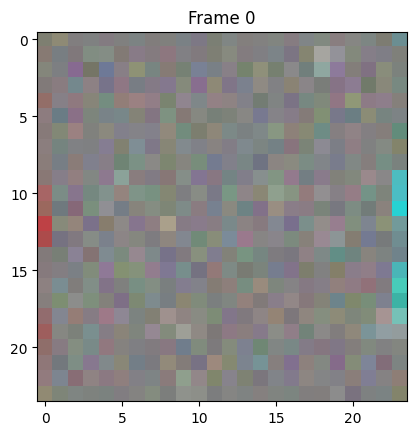

In [7]:
actions = t.tensor([[0]+119*[2]], dtype=t.int32, device=model.device)
negative_actions = t.tensor([[0]+29*[2]], dtype=t.int32, device=model.device)
z = render_video(actions, n_steps=4, cfg=0, negative_actions=None, clamp=True)
frames = pred2frame(z)

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# z[0] shape: (num_frames, height, width, 3), where num_frames = frames.shape[1]
frames_np = frames[0].permute(0, 2, 3, 1).cpu().numpy()  # shape: (num_frames, height, width, 3)

fig, ax = plt.subplots()
im = ax.imshow(frames_np[0])
ax.set_title('Frame 0')

def animate(i):
    im.set_data(frames_np[i])
    ax.set_title(f'Frame {i}')
    return [im]

ani = animation.FuncAnimation(
    fig, animate, frames=frames_np.shape[0],
    interval=200, blit=True, repeat=True
)

plt.show()

# Optional: To save the gif uncomment below (requires pillow, install with `pip install pillow`)
from collections import Counter
# Majority vote over values in actions for the filename
if actions is not None:
    # Flatten actions tensor and convert to list
    action_vals = actions.flatten().tolist()
    majority_val = Counter(action_vals).most_common(1)[0][0]
    ani.save(f"sample_{majority_val}.gif", writer="pillow")
else:
    ani.save("sample_unknown.gif", writer="pillow")


